<a href="https://colab.research.google.com/github/sujin-create/hodlhodl/blob/CoinTrading/CoinTrading/%EC%9D%B4%EC%83%81%EA%B0%92%EB%B0%9C%EA%B2%AC%EC%8B%9C_%EB%A9%94%EC%9D%BC%EC%A0%84%EC%86%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

alert_mail sending to user

In [1]:
!pip install pymysql

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 43 kB 960 kB/s 


In [2]:
import pymysql 

In [3]:
conn = pymysql.connect(host='autotrading-db.cjolqhecq70a.ap-northeast-2.rds.amazonaws.com',
                       user = 'admin',
                       password='autotrading1234',
                       db = 'AutoTrading',
                       charset = 'utf8mb4')
curs = conn.cursor(pymysql.cursors.DictCursor) #dictionary로 접근 

In [4]:
get_email = "select email from Account_user"
curs.execute(get_email)
user_email = curs.fetchall()
user_email

[{'email': 'asdf@naver.com'},
 {'email': 'baeksujin@naver.com'},
 {'email': 'qsoojinq@naver.com'},
 {'email': 'test1@naver.com'}]

In [5]:
from getpass import getpass
secret = getpass('Enter the secret value: ')

Enter the secret value: ··········


In [6]:
# -*- coding:utf-8 -*-
 
import smtplib
from email.mime.text import MIMEText

def smtp_setting(email, password):

  #session 생성
  smtp = smtplib.SMTP('smtp.naver.com', 587)
  smtp.ehlo()      # say Hello
  smtp.starttls()  # TLS 사용시 필요
  smtp.login(email, secret)
  return smtp
  


In [7]:
sender = 'qsoojinq@naver.com'
email = sender
receiver = user_email[2]['email']

In [8]:
def send_naver_mail(sender, receiver, email,password, subject, content):
    try:
      # SMTP 세션 생성
      smtp = smtp_setting(email, password)
      # 이메일 데이터 설정
      msg = MIMEText(content)
      msg['Subject'] = subject
      msg['From'] = sender  # 발신자
      msg['To'] = receiver  # 수신자

      # 메일전송여부
      # 메일 전송여부
      qeury = "select sell from detect ORDER BY id DESC LIMIT 1;"
      curs.execute(qeury)
      is_sell = curs.fetchall()
      is_sell = is_sell[0]['sell']

      if is_sell:
        # 메일 전송
        smtp.sendmail(sender, receiver, msg.as_string())
        print("email 전송에 성공하였습니다. 매도시점 알림제공 완료.")
      else:
        print("매도 시점이 아닙니다.(email을 전송하지않습니다)")
    except Exception as e:
      print('error', e)
    finally:
      if smtp is not None:
        smtp.quit()

    

In [9]:
send_naver_mail(sender, receiver,email, secret,
           '안녕하세요. AutoTrading팀입니다.',# 메일 제목
          'AutoTrading입니다. [경고] 이상값이 탐지 되었습니다. 사이트에 들어가 이상값을 확인하고 매도를 결정하세요') # 메일 내용



매도 시점이 아닙니다.(email을 전송하지않습니다)


# **EC2 server에서 사용할 코드**

In [ ]:
from time import sleep 
import smtplib
from email.mime.text import MIMEText
from getpass import getpass
import pymysql

while 1:
  print("!!!!!!!!!!!start!!!!!!!!!!")
  secret = "YOUR PW"
  conn = pymysql.connect(host='autotrading-db.cjolqhecq70a.ap-northeast-2.rds.amazonaws.com',
                       user = 'admin',
                       password='autotrading1234',
                       db = 'AutoTrading',
                       charset = 'utf8mb4')
  curs = conn.cursor(pymysql.cursors.DictCursor) #dictionary로 접근 
  get_email = "select email from Account_user"
  curs.execute(get_email)
  user_email = curs.fetchall()
 
  def smtp_setting(email, password):

    #session 생성
    smtp = smtplib.SMTP('smtp.naver.com', 587)
    smtp.ehlo()      # say Hello
    smtp.starttls()  # TLS 사용시 필요
    smtp.login(email, secret)
    return smtp
    
  sender = 'qsoojinq@naver.com'
  email = sender
  receiver = user_email[2]['email']
  

  def send_naver_mail(sender, receiver, email,password, subject, content):
      try:
        # SMTP 세션 생성
        smtp = smtp_setting(email, password)
        # 이메일 데이터 설정
        msg = MIMEText(content)
        msg['Subject'] = subject
        msg['From'] = sender  # 발신자
        msg['To'] = receiver  # 수신자

        # 메일전송여부
        # 메일 전송여부
        qeury = "select sell from detect ORDER BY id DESC LIMIT 1;"
        curs.execute(qeury)
        is_sell = curs.fetchall()
        is_sell = is_sell[0]['sell']

        if is_sell:
          # 메일 전송
          smtp.sendmail(sender, receiver, msg.as_string())
          print("email 전송에 성공하였습니다. 매도시점 알림제공 완료.")
        else:
          print("매도 시점이 아닙니다.(email을 전송하지않습니다)")
      except Exception as e:
        print('error', e)
      finally:
        if smtp is not None:
          smtp.quit()

  send_naver_mail(sender, receiver,email, secret,
            '안녕하세요. AutoTrading팀입니다.',# 메일 제목
            'AutoTrading입니다. [경고] 이상값이 탐지 되었습니다. 사이트에 들어가 이상값을 확인하고 매도를 결정하세요') # 메일 내용

  sleep(250)#5분.
    

!!!!!!!!!!!start!!!!!!!!!!
매도 시점이 아닙니다.(email을 전송하지않습니다)


KeyboardInterrupt: ignored

**EC2 server와 메일전송**

- EC2 server에서 돌려줌으로써, 5분마다 매도 타이밍을 체크하면서 타이밍 감지시 회원가입때 가입한 이메일로 경고 메시지를 전송합니다.
- 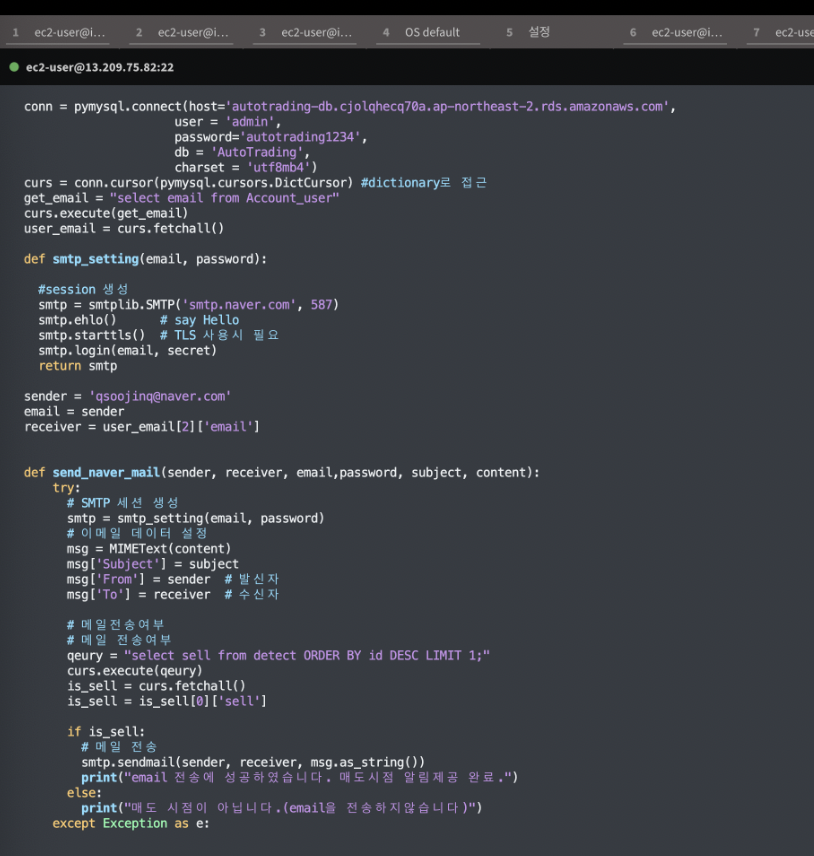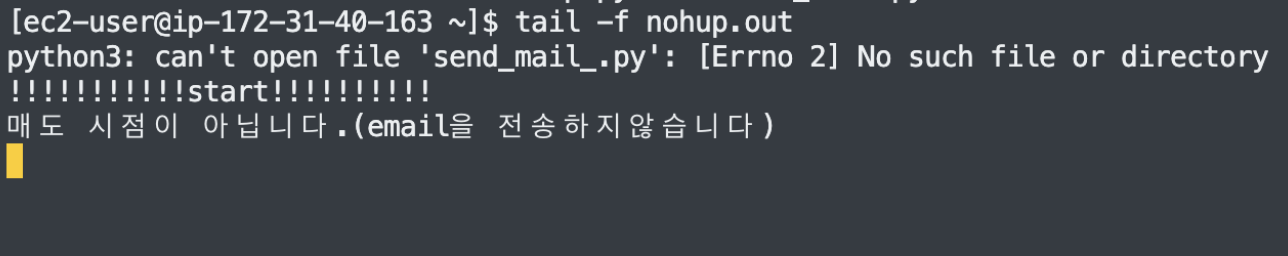
- 


# **만약 이상값이 탐지 된다면 메일을 보냅니다.**

In [10]:
def send_naver_mail_testing(sender, receiver, email,password, subject, content):
    try:
      # SMTP 세션 생성
      smtp = smtp_setting(email, password)
      # 이메일 데이터 설정
      msg = MIMEText(content)
      msg['Subject'] = subject
      msg['From'] = sender  # 발신자
      msg['To'] = receiver  # 수신자

      # 메일전송여부
      # 메일 전송여부
      qeury = "select sell from detect ORDER BY id DESC LIMIT 1;"
      curs.execute(qeury)
      is_sell = curs.fetchall()
      is_sell = is_sell[0]['sell']

      # if is_sell:
      # 메일 전송이 잘 되는지 if문을 풀어 확인.
      smtp.sendmail(sender, receiver, msg.as_string())
      print("email 전송에 성공하였습니다. 매도시점 알림제공 완료.")
      # else:
        # print("매도 시점이 아닙니다.(email을 전송하지않습니다)")
    except Exception as e:
      print('error', e)
    finally:
      if smtp is not None:
        smtp.quit()

    

In [11]:
send_naver_mail_testing(sender, receiver,email, secret,
           '안녕하세요. AutoTrading팀입니다.',# 메일 제목
          'AutoTrading입니다. [경고] 이상값이 탐지 되었습니다. 사이트에 들어가 이상값을 확인하고 매도를 결정하세요') # 메일 내용


email 전송에 성공하였습니다. 매도시점 알림제공 완료.


- 관리자 메일 : qsoojinq@naver.com
- 회원(User)메일 : qsoojinq@naver.com으로 가입을 하고 잘 보내졌는지 확인.
다른 이메일의 경우, 임의로 회원가입을 진행하였기에 실제 있는 이메일이 아니라 전송이 실패.
- 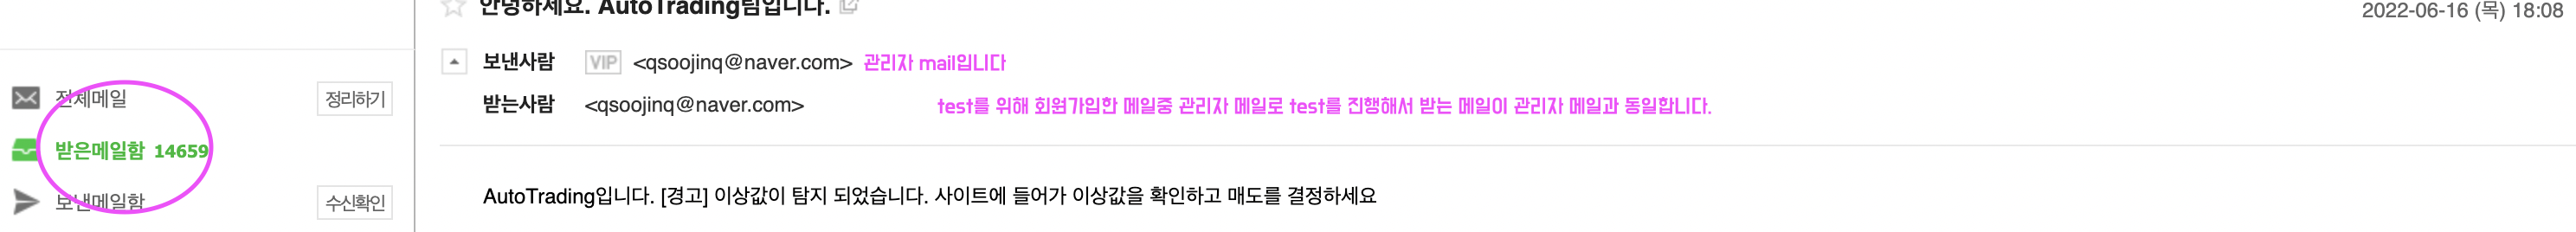
